# PCA Analysis on Breast Cancer Dataset
Loading data and importing libraries.

In [9]:

%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from manualPCA import ManualPCA
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
pca = ManualPCA(n_components=2)

# Project data using the equation: z = U.T (x - mu)
X_projected = pca.fit_transform(X)
X_pca=pca.transform(X)

error_2d = pca.compute_reconstruction_error(X,   X_pca)
kept_variance = np.sum(pca.explained_variance_ratio) * 100
lost_variance = 100 - kept_variance

# Reconstruct data using the equation: x = U z + mu
x_reconstructed = pca.inverse_transform(X_projected)

reconstruction_loss = np.sum((X - x_reconstructed) ** 2)
original_energy = np.sum(X ** 2)
relative_error = reconstruction_loss / original_energy

print(f"Relative Error: {relative_error:.4f}")
print(f"Reconstruction Error (with 2 components): {error_2d:.4f}")
print("Original Shape:", X.shape)     
print("Projected Shape:", X_projected.shape) 
print(f"Explained Variance Ratio: {pca.explained_variance_ratio}")
print(f"Data Preserved: {kept_variance:.2f}%")  
print(f"Data Lost (Error %): {lost_variance:.2f}%") 


Relative Error: 0.0145
Reconstruction Error (with 2 components): 809.7928
Original Shape: (569, 30)
Projected Shape: (569, 2)
Explained Variance Ratio: [0.44272026 0.18971182]
Data Preserved: 63.24%
Data Lost (Error %): 36.76%


## Visualization and Equations

### PCA Equations
1. **Projection**: $z = U^T (x - \mu)$
2. **Reconstruction**: $x_{approx} = U z + \mu$

### PCA Notes
- **Dimensionality Reduction**: PCA projects high-dimensional data (30 features) onto a lower-dimensional subspace (2 components) defined by the eigenvectors of the covariance matrix.
- **Variance Maximization**: The principal components are aligned with the directions of maximum variance in the data.
- **Lossy Compression**: Since we discard components with lower eigenvalues, some information is lost, which is measured by the reconstruction error.

Visualizing the 2D projection and the reconstruction quality.

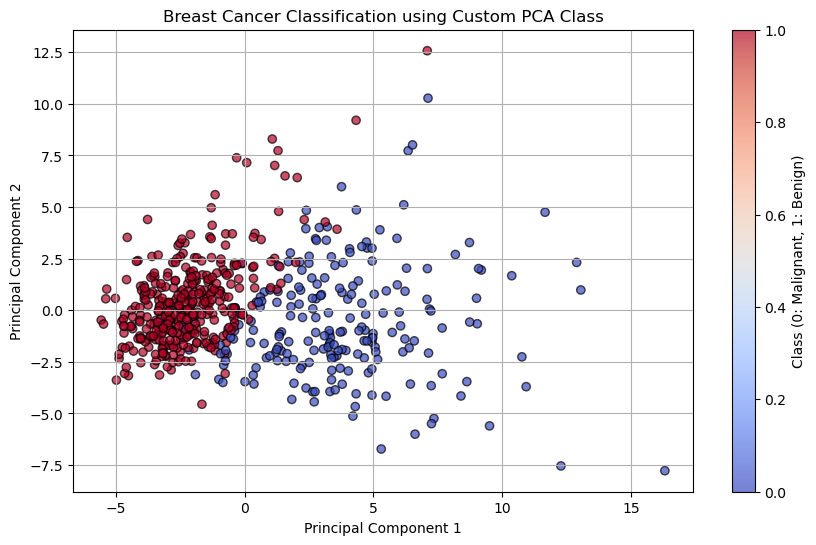

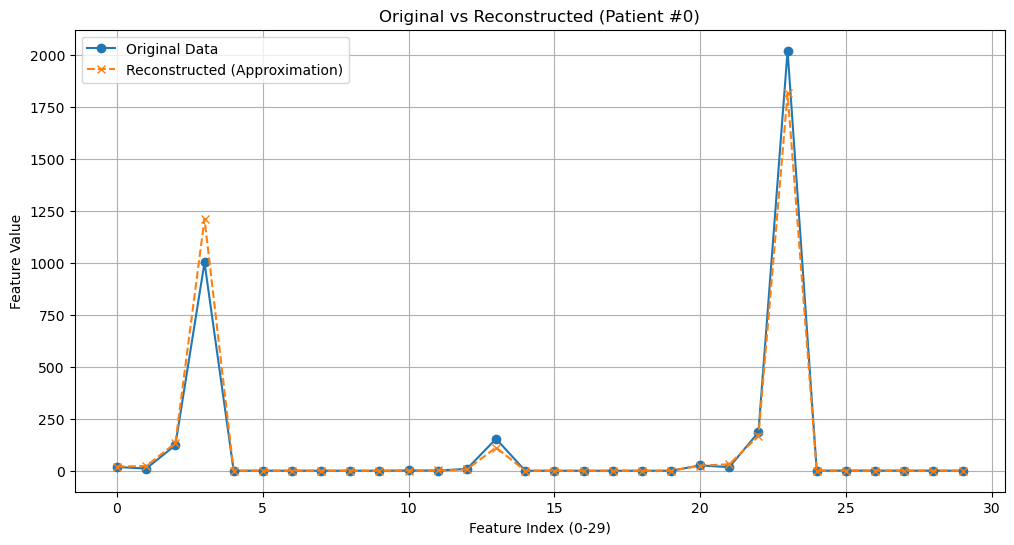

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], 
            c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0: Malignant, 1: Benign)')
plt.title('Breast Cancer Classification using Custom PCA Class')
plt.grid(True)
plt.show()



# Visualizing Original vs Reconstructed Data for a Sample
sample_idx = 0
original_sample = X[sample_idx]
reconstructed_sample = pca.inverse_transform(X_projected)[sample_idx] 

plt.figure(figsize=(12, 6))
plt.plot(original_sample, label='Original Data', marker='o')
plt.plot(reconstructed_sample, label='Reconstructed (Approximation)', marker='x', linestyle='--')
plt.legend()
plt.title(f"Original vs Reconstructed (Patient #{sample_idx})")
plt.xlabel("Feature Index (0-29)")
plt.ylabel("Feature Value")
plt.grid(True)
plt.show()